# Tarea 2: Derivación numérica

Fecha de envío del PR inicial: **martes 14 de marzo**

Fecha de aceptación del PR: **lunes 20 de marzo**

## Ejercicio 1: Derivada *derecha*

(a) Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la aproximación de la derivada, que se basa en su definición:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

lo que requiere la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

(b) A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). 

Para ser concretos, prueben su implementación de `derivada_derecha` con la función de prueba $f(x) = 3x^3-2$, en $x_0=1$. Dibujen, como función de $h$, el error de su cálculo; usen escala logarítmica en ambos ejes. A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada, o sea, cómo nos acercamos al valor *exacto* de la deriva al considerar $lim_{h\to 0}$? 


In [10]:
#= 
Incluir comentarios y documentación

Si es necesario que expliciten el tipo de alguna de los argumentos de
la función, háganlo a su conveniencia

=#
function derivada_derecha(f, x0, h)
    # código
end

derivada_derecha (generic function with 1 method)

In [1]:
function f(x)
    return (3x^3)-2
end

f (generic function with 1 method)

In [2]:
"""
DERIVADA_DERECHA(f,h,x0=0,0)
esta función evaluará cierto límite, el cual estará definido por dos variables, x0 y h. 
Cabe mencionar que este programa sólo da aproximación
"""
function DERIVADA_DERECHA(f,h,x0=0.0)
    f_prima=(f(x0+h)-f(x0))/h #declaro la operación por hacer.
    derivada=f_prima #guarda los datos
end
    

DERIVADA_DERECHA

In [12]:
valor_realx0_de_f=9

9

In [12]:
conjunto_h=logspace(-13,0.0,50)

50-element Array{Float64,1}:
 1.0e-13    
 1.84207e-13
 3.39322e-13
 6.25055e-13
 1.1514e-12 
 2.12095e-12
 3.90694e-12
 7.19686e-12
 1.32571e-11
 2.44205e-11
 4.49843e-11
 8.28643e-11
 1.52642e-10
 ⋮          
 0.00120679 
 0.002223   
 0.00409492 
 0.00754312 
 0.013895   
 0.0255955  
 0.0471487  
 0.0868511  
 0.159986   
 0.294705   
 0.542868   
 1.0        

In [6]:
DERIVADA_DERECHA(f,0.00001,1.0)

9.000090000332861

In [13]:

error=[] #el error se llenará conforme se ejecute cada elemento de las h's propuestas en el vector
 for i=1:length(conjunto_h)  #el número de iteraciones del for
    
    derivadas=DERIVADA_DERECHA(f,conjunto_h[i],1.0) #la devirada ejecutada en cada valor del vector h usando la formula
    #previamente hecha
    
    error_derivada=abs(derivadas-9) #se hace la resta del valor real de la derivada menos el que obtiene el programa
    push!(error,error_derivada)#se insertan los valores en el vector de error.
    
 end

In [14]:
error

50-element Array{Any,1}:
  0.0071935  
  0.00439846 
  0.00100845 
  0.000360572
  0.000928569
  8.13809e-5 
  9.31614e-5 
  6.6285e-5  
  2.36315e-5 
  2.40643e-5 
  1.26968e-5 
  1.13757e-5 
  6.03784e-6 
  ⋮          
  0.0108655  
  0.0200218  
  0.0369045  
  0.0680588  
  0.125634   
  0.232325   
  0.431007   
  0.80429    
  1.51666    
  2.9129     
  5.76992    
 12.0        

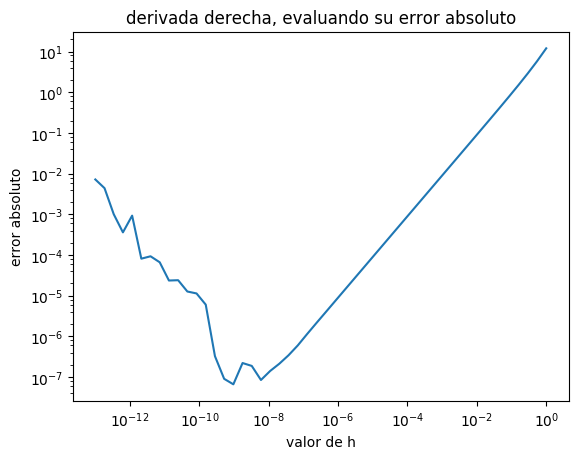

In [16]:
using PyPlot  #se usa pyplot para imprimir la gráfica
plot(conjunto_h,error)   #imprime el conjunto de h's contra el error
xlabel("valor de h")     #titulos de los ejes x y y
ylabel("error absoluto")
title("derivada derecha, evaluando su error absoluto") #titulo de la gráfica
xscale("log")    #usa escala logarítmica en x y y
yscale("log")
show()  

## Ejercicio 2: Derivada simétrica

Repitan el ejercicio anterior usando la aproximación que se basa en la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}

¿Qué pueden concluir respecto a la convergencia? ¿Cómo se compara este algoritmo con el del ejercicio anterior?

In [17]:
"""
DERIVADA_SIMÉTRICA(f,h,x0=0.0)
la finalidad de esta función es semejante al del problema 1, pero en este cas, se considerará la convergencia de los dos lados
de la función, esto quiere decir, tanto izquierda como derecha.
"""
function DERIVADA_SIMÉTRICA(f,h,x0=0.0)
    f_prima2=(f(x0+h)-f(x0-h))/(2*h)   #declaro la operación a seguir.
    derivada_sim=f_prima2
end

DERIVADA_SIMÉTRICA

In [18]:
#haciendo copy-paste del la funcion error del problema 1

error=[] #el error se llenará conforme se ejecute cada elemento de las h's propuestas en el vector
for i=1:length(conjunto_h)  #el número de iteraciones del for
    
    derivadas=DERIVADA_SIMÉTRICA(f,conjunto_h[i],1.0) #la devirada ejecutada en cada valor del vector h usando la formula
    #previamente hecha
    
    error_derivada=abs(9-derivadas) #se hace la resta del valor real de la derivada menos el que obtiene el programa
    push!(error,error_derivada)#se insertan los valores en el vector de error.
    
end

In [19]:
error

50-element Array{Any,1}:
 0.00275261 
 0.00198764 
 0.00100845 
 0.000360572
 0.000350024
 8.13809e-5 
 2.05054e-5 
 6.6285e-5  
 9.86666e-6 
 5.8792e-6  
 2.82468e-6 
 6.01642e-6 
 3.12848e-6 
 ⋮          
 4.36905e-6 
 1.48251e-5 
 5.0305e-5  
 0.000170696
 0.000579209
 0.00196539 
 0.00666899 
 0.0226294  
 0.0767864  
 0.260553   
 0.884116   
 3.0        

In [34]:
DERIVADA_SIMÉTRICA(f,0.00001,1.0)

9.00000000030321

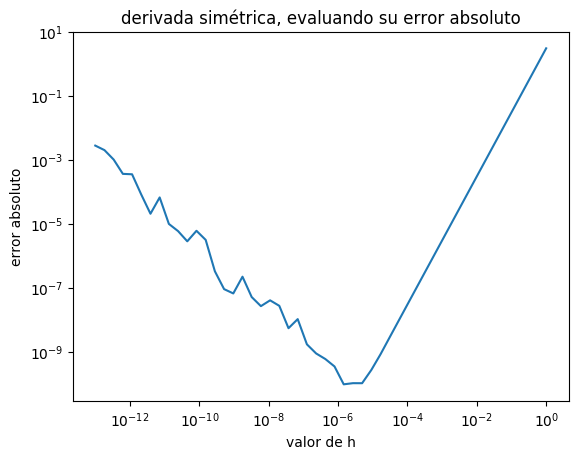

In [20]:
using PyPlot     #realiza casi lo mismo que en el problema 1
plot(conjunto_h,error)
xlabel("valor de h")
ylabel("error absoluto")
title("derivada simétrica, evaluando su error absoluto")
xscale("log")
yscale("log")
show()

El error absoluto que existe tanto en el límite definido en el problema 1 como en el problema 2 son del mismo orden, no obstante, en la modificación realizada en la función de *"DERIVADA_SIMÉTRICA"* permite que este error disminuya (siendo específicos, el error absoluto del segundo métido disminuye cerca del 75% en comparación con el primer método). También esto repercute en la convergencia de los resultados obtenidos, ya que son más cercanos al valor real.

## Ejercicio 3: Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Esto es, nos basaremos en la definición de la derivada dada por:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [21]:
"""
DERIVADA_COMPLEJA(f,h,x0)
esta función genera una derivada en números complejos
"""
function DERIVADA_COMPLEJA(f,h,x0=0.0)
    numero=f(x0+h*im)
    derivada_complex=numero/h   #se define la derivada en complejos.
    return imag(derivada_complex)
end

DERIVADA_COMPLEJA

In [22]:
DERIVADA_COMPLEJA(f,0.00001,1.0)

8.9999999997

In [23]:
error=[] #al igual que en los otros incisos, se genera un vector con el error absoluto de la funcion compleja
for i=1:length(conjunto_h)  #el número de iteraciones del for
    
    derivadas=DERIVADA_COMPLEJA(f,conjunto_h[i],1.0) #la devirada ejecutada en cada valor del vector h usando la formula
    #previamente hecha
    
    error_complex=abs(9-derivadas) #se hace la resta del valor real de la derivada menos el que obtiene el programa
    push!(error,error_complex)#se insertan los valores en el vector de error.
    
end

In [24]:
error

50-element Array{Any,1}:
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 1.77636e-15
 0.0        
 ⋮          
 4.36905e-6 
 1.48251e-5 
 5.0305e-5  
 0.000170696
 0.000579209
 0.00196539 
 0.00666899 
 0.0226294  
 0.0767864  
 0.260553   
 0.884116   
 3.0        

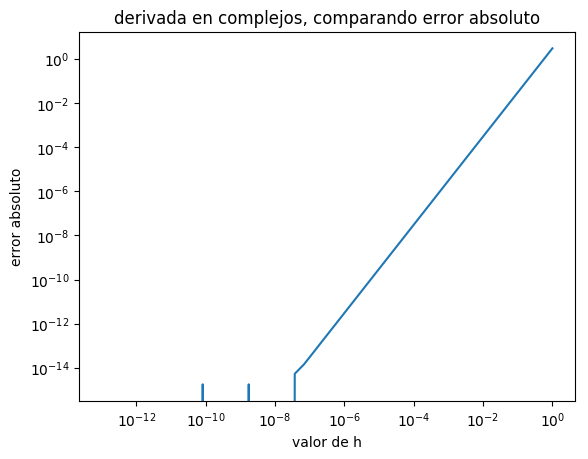

In [25]:
using PyPlot   #una vez más, se realiza la gráfica como en los problemas anteriores
plot(conjunto_h,error)
xlabel("valor de h")
ylabel("error absoluto")
title("derivada en complejos, comparando error absoluto")
xscale("log")
yscale("log")
show()

## Ejercicio 4: Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

La *derivada_compleja* ofrece mejores valores ya que varios valores tienen un error absoluto igual a cero, aproximándose así al valor real de la derivada. Además, el orden de magnitud del error absoluto en la derivada compleja es menor que en las *"derivada_derecha"* y *"derivada_simétrica"*

- ¿Qué comportamiento mostrado por las derivadas en términos de $h$ nos incomoda más? ¿A qué atribuyen esto?

Uno esperaría que entre más pequeño sea el valor de *h*, más cercano debe de ser el valor del límite al valor real. Sin embargo, en todos los casos no se observó este comportamient, esto se ve reflejado ea mayor medida en los métodos de *derivada_derecha* y *derivada_simétrica*.
En la tarea pasada, existía inestabilidad numérica en la fórmula general cuando uno de los valores (en ese caso c) era muy pequeño, lo que hacía el programa era "redondear" los valores, perdiendo así cifras significativas. Esto también puede ocurrir en esta tarea:
En la derivada simétrica de la forma:
\begin{equation}
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}
y en la derivada derecha
\begin{equation}
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

Cuando se evalúa la función como x0-h, al ser x0 mayor que h se puede perder precisión en lso resultados.